In [1]:
# install.packages("readODS")
# install.packages("dplyr")
# install.packages("pastecs")
# install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




In [3]:
library(readODS)
library(dplyr)
library(pastecs)
library(psych)

Read "Umfrage 2015.ods" as data frame using "readODS" library

[1] 129

[1]   -1 3560

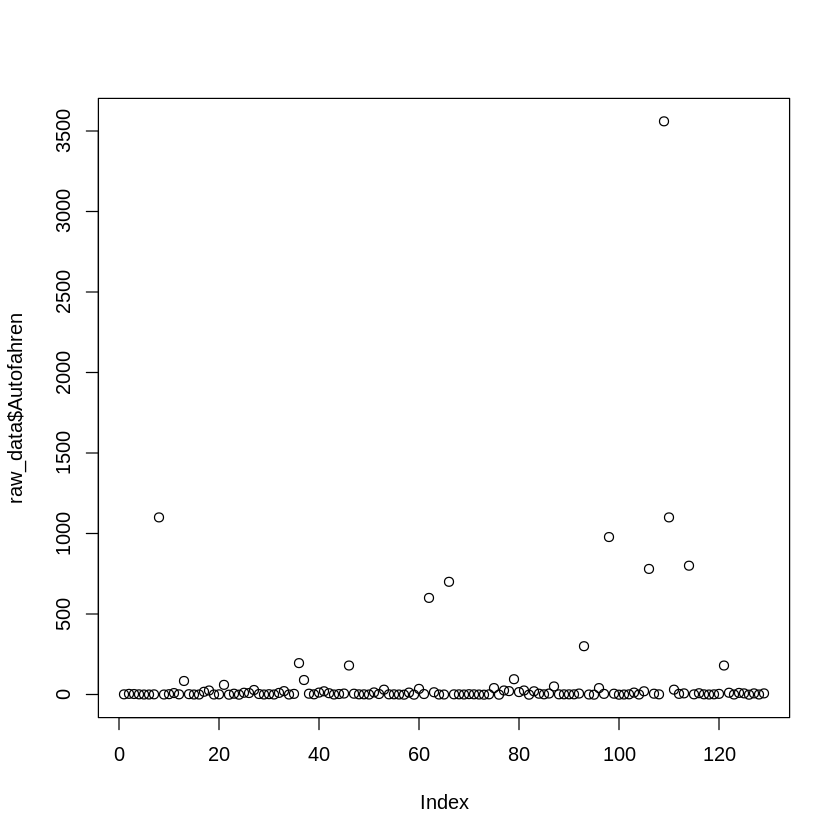

In [8]:
raw_data <- read_ods(path = "Umfrage 2015.ods",
                     sheet = 1,
                     col_names = TRUE,
                     col_types = NULL,
                     na = "",
                     skip = 0,
                     formula_as_formula = FALSE,
                     range = NULL,
                     row_names = FALSE,
                     strings_as_factors = FALSE,
                     verbose = FALSE)
# View(raw_data)
length(raw_data$Autofahren)
range(raw_data$Autofahren)
plot(raw_data$Autofahren)

Use column 'Autofahren' only

In [10]:
raw_autofahrer <- raw_data$Autofahren
# View(raw_autofahrer)

Get number of rows with '-1' value
(supposed to be 10)

In [11]:
is_neg_1 <- raw_autofahrer == -1
sum(is_neg_1)

[1] 10

Clean raw data based on colum 'Autofahren', delete '-1' values

[1]    0 3560

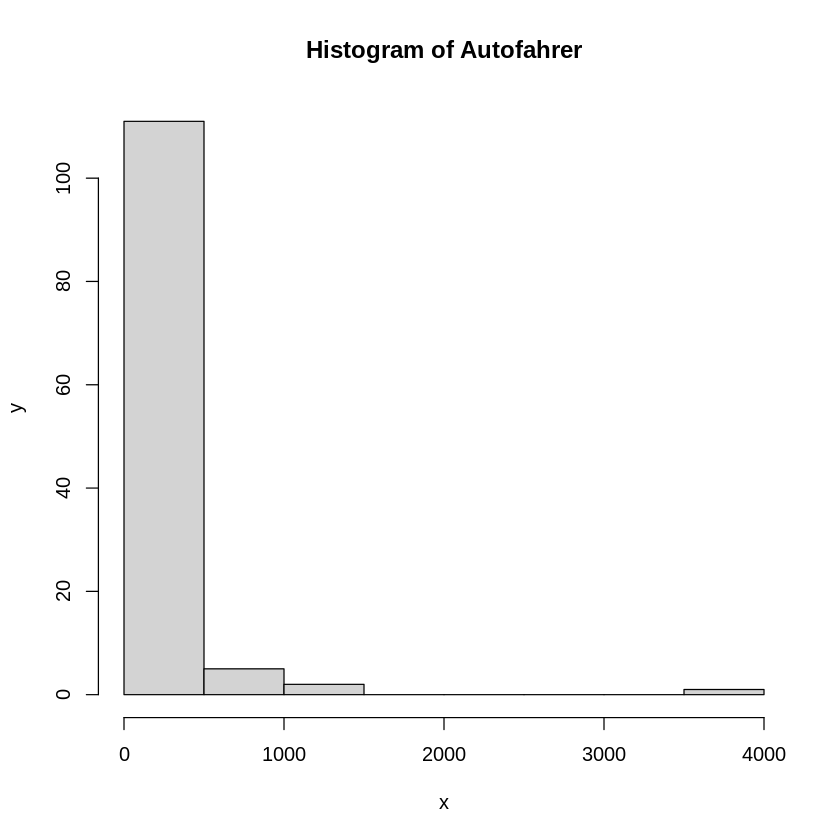

In [12]:
autofahrer <- raw_autofahrer[raw_autofahrer != "-1"]
# View(autofahrer)
# str(autofahrer)
# plot(autofahrer)
hist(autofahrer, 
     xlab = 'x',
     ylab = 'y',
     main = 'Histogram of Autofahrer')
# length(autofahrer) --> should be 119
# Range and correct elimination check
range(autofahrer) # --> must not have '-1' as min value

mean, median, 25th and 75th quantiles, min, max

In [13]:
summary(autofahrer)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    4.00   97.03   20.00 3560.00 

Teil-Mediane
1. Unterer Median
2. Oberer Median
3. Durchschnittlicher Median

In [14]:
# Teil-Mediane
# 1. Sort data frame
sorted_autofahrer <- autofahrer[order(autofahrer)]
# View(sorted_autofahrer)
# 2. unterer Median: Ganzzahlige Division nach unten:
lowermedian <- sorted_autofahrer[length(sorted_autofahrer)%/%2]
lowermedian
# 3. Oberer Median: Ganzzahlige Division nach oben: length(sorted_autofahrer)%/%2 + 1
uppermedian <- sorted_autofahrer[length(sorted_autofahrer)%/%2 + 1]
uppermedian
# Median
median(autofahrer)

[1] 4

[1] 4

[1] 4

Modus:
1. Automatisch
2. Manuell zur Prüfung

In [15]:
# Ansatz 1
names(table(autofahrer))[table(autofahrer)==max(table(autofahrer))]
# Ansatz 2
table(autofahrer)

[1] "1"

autofahrer
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
  22   24    4    5    5    6    3    4    2    2    2    2    3    1    1    1 
  17   20   21   25   28   30   35   40   50   60   84   90   95  180  195  300 
   1    3    2    3    1    2    1    2    1    1    1    1    1    2    1    1 
 600  700  780  800  978 1100 3560 
   1    1    1    1    1    2    1 

Mean

In [17]:
mean(autofahrer)

[1] 97.02521

Tukey's five number summary (minimum, lower-hinge, median, upper-hinge, maximum)

In [16]:
fivenum(autofahrer)

[1]    0    1    4   20 3560

Varianz

In [18]:
var(autofahrer)

[1] 146313.3

Standard Devation

In [19]:
sd(autofahrer)

[1] 382.5092

Quantile

In [20]:
quantile(autofahrer)

0%  25%  50%  75% 100% 
   0    1    4   20 3560

(Inter-) Quartilabstand

In [21]:
IQR(autofahrer)

[1] 19

Warum ist die Standardabweichung so viel größer als der Quartilsabstand?



*   Standardabweichung: Die Standardabweichung besagt, wie viel der gesamte Datensatz vom Mittelwert (mean) abweicht. Daher ist die SD von Extremwerten (Outliers) stark abhängig. SD ist insbesondere bei Normal-/Gaussverteilungen sehr gut geeignet.
*   (Inter-)Quartilabstand: Der IQR besagt, wie viel Varianz in 50% des geordneten Datensatzes enthalten ist. Es wird also nicht der gesamte Datensatz in die Varianzberechnung einbezogen. Somit sind Extremwerte nicht in demselben Maß enthalten wie in der SD. Somit ist der IQR bei schiefen Verteilungen besser geeigned. 

Die SD ist also um ein Vielfaches größer als IQR, weil wir im vorliegenden Datensatz Extremwerte haben, die im Fall der SD enthalten sind, aber in IQR ausgelassen werden. 
Analog kann man SD und IQR zu arithmetischem Mittel (mean) und Median vergleichen. Median und IQR sind robust gegen Extremwerte, SD und mean enthalten diese dagegen. 

